# Assignment 2 - Spatial Data

***Student Name:***

Thomas Braun

***Student Number:***

1487353

In this assignment, you will be asked to use your knowledge about spatial correlation functions and spatial weights to visualize several world bank data sets. Please be aware that your code is only part of the grade (60%). The actual visualization as well as your analytical approach in interpretation of the results will be graded as well (40%). The dealine for this assignment is **on 2nd of November 2022, 23:55 PM**.


**Submit the notebook, and a html version of your notebook via the github Classroom repo**. Please use your studentnumber as file name (i.e. s145678.ipynb and s145678.html). If you do not include both the notebook and the html file, your submission will NOT be considered.
The easiest way to covert your notebook to an html file is to open it via jupyter notebook and then select File -> Download as -> HTML.  
**Please try to do this multiple days before the deadline so we can help you if you run into problems!**

Tasks:

    1) select 2 SDGs 
    2) formulate your research questions 
    3) transform data into weight matrices, make Moran's plots and interpret them
    4) display data in choropleth maps 
    5) answer your research questions in a short summary
 

In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import libpysal as ps

## Task 1: Sustainable Development Goals & Shapefiles

On this website: https://www.un.org/sustainabledevelopment/sustainable-development-goals/ the UN summarizes their sustainable development goals (SDGs). 

Select two goals to work on for this assignment.


***I will be working on these two goals:***
    

- **Goal 4: Quality Education**\
        *Obtaining a quality education is the foundation to improving people’s lives and sustainable development.*
- **Goal 10: Reduced Inequalities**\
        *To reduce inequalities, policies should be universal in principle, paying attention to the needs of disadvantaged and marginalized populations.*

We would like you to focus on the African Continent for this exercise. Find shapefiles for the map of Africa and let us know where you found the shapefiles. Also let us know in which year the shapefiles were created and why this is relevant (hint: South Sudan). You might be able to find different shapefiles. Analyze your shapefiles. Like with any kind of "real" data, shapefiles can have *obstacles* that must be dealt with. For example, if your shapefile has islands, how do you define their adjacent countries? Shapefiles can also have *defects*. For example, an out of date shapefile might show old borders of a country, from when it used to border on another country that it's no longer adjacent to. Of course, if you're displaying historical data, that might be appropriate.
We want you to examine your shapefiles for obstacles, defects and other peculiarities. How will you handle them? Motivate your choice to use these specific shapefiles.

***Link to shapefiles:***

https://hub.arcgis.com/datasets/07610d73964e4d39ab62c4245d548625/explore

### Load data, remove superfluous Index column, and Rename Columns

In [97]:
africa_shape = gpd.read_file('data/shape/Africa_Boundaries.shp')
africa_df = africa_shape.set_index('OBJECTID')
africa_df = africa_df.rename(columns={'ISO':'iso', 'NAME_0':'country', 'Continent':'continent', 'REgion':'region'})
africa_df

,iso,country,continent,region,geometry
OBJECTID,,,,,
1,AGO,Angola,Africa,None,"MULTIPOLYGON (((11.70236 -16.50764, 11.70236 -..."
2,ATF,French Southern Territories,Africa,None,"MULTIPOLYGON (((68.86333 -50.01889, 68.86166 -..."
3,BDI,Burundi,Africa,Eastern_Africa,"POLYGON ((30.41152 -2.31061, 30.41243 -2.31180..."
4,BEN,Benin,Africa,None,"MULTIPOLYGON (((1.87042 6.28819, 1.87042 6.287..."
5,BFA,Burkina Faso,Africa,None,"POLYGON ((-0.45567 15.08082, -0.44206 15.06812..."
6,BWA,Botswana,Africa,None,"POLYGON ((25.21502 -17.79051, 25.24286 -17.792..."
7,CAF,Central African Republic,Africa,None,"POLYGON ((22.54251 10.99812, 22.55266 10.99373..."
8,CIV,Côte d'Ivoire,Africa,None,"MULTIPOLYGON (((-6.66930 4.72958, -6.66930 4.7..."
9,CMR,Cameroon,Africa,None,"MULTIPOLYGON (((9.63403 3.56208, 9.63403 3.561..."


Many countries do not have their region annotated. Also, annotation is inconsistent, so redo all values of `region`.
In addition, for future analysism make sure to distinguish between Sub-Saharan Africa and Mediterranean-Africa.

In [98]:
northern_africa = ['Algeria', 'Egypt', 'Libya', 'Morocco', 'Tunisia', 'Western Sahara']
eastern_africa = ['Burundi', 'Comoros', 'Djibouti', 'Eritrea', 'Ethiopia', 'French Southern Territories', 'Kenya', 'Madagascar', 'Malawi', 'Mauritius', 'Mayotte', 'Mozambique', 'Reunion', 'Rwanda', 'Seychelles', 'Somalia', 'South Sudan', 'Sudan', 'Tanzania', 'Uganda', 'Zambia', 'Zimbabwe']
southern_africa = ['Botswana', 'Lesotho','Namibia', 'South Africa', 'Swaziland']
western_africa = ['Benin', 'Burkina Faso', 'Cape Verde', 'Côte d\'Ivoire', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Liberia', 'Mali', 'Mauritania', 'Niger', 'Nigeria', 'Senegal', 'Sierra Leone', 'Togo']
central_africa = ['Angola', 'Cameroon', 'Central African Republic', 'Chad', 'Democratic Republic of the Congo', 'Equatorial Guinea', 'Gabon', 'Republic of Congo', 'Sao Tome and Principe']

regions = ['northern_africa', 'eastern_africa', 'southern_africa', 'western_africa', 'central_africa']

conditions = [africa_df['country'].isin(eval(region)) for region in regions]
africa_df['region'] = np.select(conditions, regions, default=None)
africa_df['location'] = np.where(africa_df['region'] == 'northern_africa', 'mediterranean-africa', 'sub-saharan-africa')

africa_df

,iso,country,continent,region,geometry,location
OBJECTID,,,,,,
1,AGO,Angola,Africa,central_africa,"MULTIPOLYGON (((11.70236 -16.50764, 11.70236 -...",sub-saharan-africa
2,ATF,French Southern Territories,Africa,eastern_africa,"MULTIPOLYGON (((68.86333 -50.01889, 68.86166 -...",sub-saharan-africa
3,BDI,Burundi,Africa,eastern_africa,"POLYGON ((30.41152 -2.31061, 30.41243 -2.31180...",sub-saharan-africa
4,BEN,Benin,Africa,western_africa,"MULTIPOLYGON (((1.87042 6.28819, 1.87042 6.287...",sub-saharan-africa
5,BFA,Burkina Faso,Africa,western_africa,"POLYGON ((-0.45567 15.08082, -0.44206 15.06812...",sub-saharan-africa
6,BWA,Botswana,Africa,southern_africa,"POLYGON ((25.21502 -17.79051, 25.24286 -17.792...",sub-saharan-africa
7,CAF,Central African Republic,Africa,central_africa,"POLYGON ((22.54251 10.99812, 22.55266 10.99373...",sub-saharan-africa
8,CIV,Côte d'Ivoire,Africa,western_africa,"MULTIPOLYGON (((-6.66930 4.72958, -6.66930 4.7...",sub-saharan-africa
9,CMR,Cameroon,Africa,central_africa,"MULTIPOLYGON (((9.63403 3.56208, 9.63403 3.561...",sub-saharan-africa


***Year shapefiles were created:***


The webpage states that the shapefiles were first published in 19-11-2014 and last updated on 27-01-2021. However, the [ArcGIS Hub summary](https://hub.arcgis.com/datasets/07610d73964e4d39ab62c4245d548625_0/about) only specifies a light update in 2016. However, for this assignment this shapefile should be sufficiently recently updated, as both dates are past the last major border change on the African continent (i.e. independence of South Sudan from Sudan on 09-07-2011). This was the most recently updated shapefile I could find.

***Motivation for selecting the shapefile:***

For every SDG, you can find "Goal x targets" on the UN website. Use these targets to formulate at least one question per SDG (i.e., at least two questions that you want to answer). The question can be about the current state of a SDG in Africa, comparing countries/regions within Africa or a longitudinal comparison of a region. 

Make your research question concrete. Something like "What is the state of SDG 7 in Africa?" is too broad. Something like: "Using variable x a proxy for the development of SDG 7, how do the West-African Countries fare compared to the rest of Africa?" is much more concrete, and narrows your question down to an achievable outcome. It also gives you something to discuss in your report.   

Discuss your research question on MS Teams if you are not sure. Help each other, also by asking for help if you are not used to formulate research questions yourself! 


We will answer questions and doubts about research questions on Teams until **October 31st**. That means: if you would like to have us check your question before you continue working on this assignment, make sure you post it until October 31st, we will answer as quickly as possible. After October 31th , we will not check individual research questions, but you will still be able to see what we answered and you can refer to the forum as a guideline. 


Why this particular shapefile was used:
- Most updated version available.
- Seemingly accurate (detailed) representation of borders.
- Per country basis. 
    - I want to look at diferences between countries in education quality. This shapefile takes does not split countries in multiple objects, which makes it easier to work with for this problem.

## Task 2: Research Questions & Data Sources

***1st research question:***



Regarding **SDG 4: Quality Education**
- Research question: *Using COVID-19 school closure index as a proxy variable for SDG4, how does Sub-Saharan Africa compare to Mediterranean Africa in loss of education days between 2019 and 2021?*

***2nd research question:***

Regarding **SDG 10: Reduced Inequalities**
- Research question: *Using the Gini index as a proxy variable for SDG10, how did Sub-Saharan Africa compare to Mediterranean Africa in 2019?*

**Note:** Gini indices measure inequality on a scale from zero, indicating perfect equality, to 100, indicating one person having all resources. Countries’ income Ginis typically lie within a range of 25 to 60.

**Note:** For all research quesions we distinguish between Sub-Saharan Africa (i.e. Western, Southern, Central, and Eastern Africa) and Mediterranean Africa (Northern Africa).

On the worldbank website, you can easily find matching data: https://datacatalog.worldbank.org/dataset/sustainable-development-goals. You are free to use other data sources. Make sure to share them with us though. 

**Important:**

! We want to re-run your analyses, so please include a link to the data that you are using in your submission!




***Links to data:***

Information on SDG4: https://datatopics.worldbank.org/sdgatlas/goal-4-quality-education?lang=en \
World Bank Data SDG4: https://datatopics.worldbank.org/sdgatlas/data/goal04/goal04.lpovclosuresinternet.csv

Information on SDG10: https://datatopics.worldbank.org/sdgatlas/goal-10-reduced-inequalities/?lang=en \
World Bank Data SDG10: https://datatopics.worldbank.org/sdgatlas/data/goal10/goal10.global_gini.csv

### Load SDG statistics and combine with shape data.

Open SDG4 Data and save to a `dataframe`.

In [99]:
covid_closure = pd.read_csv('data/numbers/goal04.lpovclosuresinternet.csv')
covid_closure = covid_closure.rename(columns={'iso3c':'iso'})
covid_closure

,iso,gni_per_capita,learning_poverty,unicef_total_closed,internet_users,EG.ELC.ACCS.ZS,population
0,AFG,500,93.447998,240,18.400000,97.699997,38972230
1,ALB,5260,16.478642,99,72.237677,100.000000,2837849
2,ARE,41770,32.832924,208,100.000000,100.000000,9287289
3,ARG,9010,59.147190,260,85.500000,100.000000,45376763
4,ARM,4470,27.241146,53,76.507701,100.000000,2805608
...,...,...,...,...,...,...,...
113,URY,15950,43.618366,126,86.100000,100.000000,3429086
114,USA,64650,4.251830,193,90.900000,100.000000,331501080
115,VNM,3450,18.120916,132,70.300000,100.000000,96648685
116,ZAF,6090,78.909492,196,70.000000,84.385536,58801927


Open SDG10 Data and save to a `dataframe`.

In [100]:
gini = pd.read_csv('data/numbers/goal10.global_gini.csv')
gini = gini.rename(columns={'country_code':'iso'})
gini

,iso,country_name,gini
0,SVK,Slovak Republic,23.2323
1,SVN,Slovenia,24.0315
2,BLR,Belarus,24.3834
3,UKR,Ukraine,25.6274
4,MDA,Moldova,25.7316
...,...,...,...
167,SUR,Suriname,57.8514
168,NAM,Namibia,59.0666
169,HTI,Haiti,60.7868
170,WLD,World,62.0245


Merge these dataframes with the shape data based on the iso country code. Some data will be missing and automatically annotated as `NaN`. We 

In [101]:
africa_inequality = pd.merge(africa_df, gini, on='iso', how='left')
africa_education_quality = pd.merge(africa_df, covid_closure, on='iso', how='left')

# Remove countries for which there is no relevant data
africa_education_clean = africa_education_quality.dropna().reset_index(drop=True)
africa_inequality_clean = africa_inequality.dropna().reset_index(drop=True)

## Task 3: Spatial Lag & Moran's Plot

In Lab 4 (http://darribas.org/gds16/labs/Lab_04.html) by Dani Arribas, you can see examples of weight matrices and at the end an explanation of spatial lag and the Morans plot (Watch out, this is not Moran's I/ Moran's spatial autocorrelation, which is also often calculated in spatial analytics), We have provided a modified version of this lab ready to go in this repo. 
Read and understand the concept of spatial lag first. In a Moran's plot, you can show how the value of a variable relates to it's spatial lag (or the average of this value in the surrounding areas). 

Additional information: 
* [Dani Arribas written course material](http://darribas.org/gds_scipy16/)
* [installing PySAL](https://pysal.org/docs/install/) and [PySAL tutorial](https://pysal.org/libpysal/tutorial.html)

Your tasks:

Create two Morans plots based on the variables related to your research questions and interpret them: 

What can you say about the entire continent?

Can you find meaningful subregions? 

What if you use block weights around those subregions and re-run the analysis? 

### Spatial Lag

In [102]:
# Calculate contiguity: Queen adjacency matrices:
education_queen = ps.weights.Queen.from_dataframe(africa_education_clean, ids='iso')
inequality_queen = ps.weights.Queen.from_dataframe(africa_inequality_clean, ids='iso')

# Standardize by rows 
education_queen.transform = 'R'
inequality_queen.transform = 'R'

/home/vscode/.local/lib/python3.9/site-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 8 disconnected components.
 There are 7 islands with ids: COM, EGY, ETH, LSO, MDG, MUS, ZAF.
  warnings.warn(message)


('WARNING: ', 'COM', ' is an island (no neighbors)')
('WARNING: ', 'EGY', ' is an island (no neighbors)')
('WARNING: ', 'ETH', ' is an island (no neighbors)')
('WARNING: ', 'LSO', ' is an island (no neighbors)')
('WARNING: ', 'MDG', ' is an island (no neighbors)')
('WARNING: ', 'MUS', ' is an island (no neighbors)')
('WARNING: ', 'ZAF', ' is an island (no neighbors)')
('WARNING: ', 'COM', ' is an island (no neighbors)')
('WARNING: ', 'CPV', ' is an island (no neighbors)')
('WARNING: ', 'LSO', ' is an island (no neighbors)')
('WARNING: ', 'MDG', ' is an island (no neighbors)')
('WARNING: ', 'MUS', ' is an island (no neighbors)')
('WARNING: ', 'STP', ' is an island (no neighbors)')
('WARNING: ', 'SYC', ' is an island (no neighbors)')
('WARNING: ', 'ZAF', ' is an island (no neighbors)')


/home/vscode/.local/lib/python3.9/site-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 9 disconnected components.
 There are 8 islands with ids: COM, CPV, LSO, MDG, MUS, STP, SYC, ZAF.
  warnings.warn(message)


In [103]:
education_queen.neighbors

{'BDI': ['COD'],
 'BEN': ['TGO', 'BFA', 'NER'],
 'BFA': ['CIV', 'NER', 'BEN', 'TGO', 'MLI'],
 'BWA': ['ZMB'],
 'CIV': ['GIN', 'BFA', 'MLI'],
 'CMR': ['TCD', 'GAB', 'COG'],
 'COD': ['ZMB', 'UGA', 'BDI', 'COG'],
 'COG': ['COD', 'GAB', 'CMR'],
 'COM': [],
 'DZA': ['NER', 'MRT', 'TUN', 'MLI', 'MAR'],
 'EGY': [],
 'ETH': [],
 'GAB': ['CMR', 'COG'],
 'GIN': ['CIV', 'SEN', 'MLI'],
 'LSO': [],
 'MAR': ['DZA'],
 'MDG': [],
 'MLI': ['DZA', 'NER', 'MRT', 'CIV', 'BFA', 'GIN', 'SEN'],
 'MRT': ['SEN', 'DZA', 'MLI'],
 'MUS': [],
 'NER': ['DZA', 'BEN', 'TCD', 'BFA', 'MLI'],
 'SEN': ['GIN', 'MLI', 'MRT'],
 'TCD': ['CMR', 'NER'],
 'TGO': ['BFA', 'BEN'],
 'TUN': ['DZA'],
 'UGA': ['COD'],
 'ZAF': [],
 'ZMB': ['BWA', 'COD']}

In [104]:
inequality_queen.neighbors

{'AGO': ['COD', 'ZMB', 'NAM', 'COG'],
 'BDI': ['TZA', 'RWA', 'COD'],
 'BEN': ['TGO', 'NER', 'BFA', 'NGA'],
 'BFA': ['GHA', 'NER', 'BEN', 'CIV', 'MLI', 'TGO'],
 'BWA': ['ZMB', 'ZWE', 'NAM'],
 'CAF': ['COD', 'SDN', 'SSD', 'TCD', 'CMR', 'COG'],
 'CIV': ['GHA', 'GIN', 'LBR', 'BFA', 'MLI'],
 'CMR': ['GAB', 'NGA', 'TCD', 'CAF', 'COG'],
 'COD': ['ZMB', 'BDI', 'AGO', 'COG', 'TZA', 'RWA', 'UGA', 'SSD', 'CAF'],
 'COG': ['COD', 'GAB', 'AGO', 'CMR', 'CAF'],
 'COM': [],
 'CPV': [],
 'DZA': ['NER', 'MRT', 'TUN', 'MAR', 'MLI'],
 'EGY': ['SDN'],
 'ETH': ['SSD', 'KEN', 'SDN'],
 'GAB': ['CMR', 'COG'],
 'GHA': ['CIV', 'BFA', 'TGO'],
 'GIN': ['SEN', 'GNB', 'LBR', 'SLE', 'CIV', 'MLI'],
 'GMB': ['SEN'],
 'GNB': ['SEN', 'GIN'],
 'KEN': ['TZA', 'SSD', 'ETH', 'UGA'],
 'LBR': ['CIV', 'GIN', 'SLE'],
 'LSO': [],
 'MAR': ['DZA'],
 'MDG': [],
 'MLI': ['DZA', 'NER', 'MRT', 'CIV', 'BFA', 'GIN', 'SEN'],
 'MOZ': ['MWI', 'TZA', 'ZWE', 'SWZ', 'ZMB'],
 'MRT': ['SEN', 'DZA', 'MLI'],
 'MUS': [],
 'MWI': ['TZA', 'MOZ', 'ZMB'

There is an error with the shapefile, as it suggest that South Africa has no neighbors. As a result, neighbouring countries Namibia, Botswana, Zimbabwe, Mozambique, and Swaziland do not have South Africa as a neighbour. Indeed, Lesotho does not even have any neighbours and is thus considered an island, as it lies within South Africa.

Get numeric values in order to calculate the spatial lag.

In [105]:
africa_education_clean['unicef_total_closed'] = pd.to_numeric(africa_education_clean['unicef_total_closed'])
africa_inequality_clean['gini'] = pd.to_numeric(africa_inequality_clean['gini'])

splag_queen_education = ps.weights.lag_spatial(education_queen, africa_education_clean['unicef_total_closed'])
splag_queen_inequality = ps.weights.lag_spatial(inequality_queen, africa_inequality_clean['gini'])

### Calculate Block-Weights

In [106]:
block_education = ps.weights.block_weights(africa_education_clean['location'])
block_inequality = ps.weights.block_weights(africa_inequality_clean['location'])

block_lag_education= ps.weights.lag_spatial(block_education, africa_education_clean['unicef_total_closed'])
block_lag_inequality = ps.weights.lag_spatial(block_inequality, africa_inequality_clean['gini'])

/home/vscode/.local/lib/python3.9/site-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


### Visualize Block-Weights

In order to properly compare the block weights we are visualising the data using Moran Plots. I decided to standardize the data first in order to be able to compare the regions to each other and show their relative change in education quality and inequality. [Here](https://geodacenter.github.io/workbook/5a_global_auto/lab5a.html#the-moran-scatter-plot) is an article that explains this standardization can be done and how these Moran plots can be interpreted:

*The scatter plot is then easily decomposed into four quadrants. The upper-right quadrant and the lower-left quadrant correspond with positive spatial autocorrelation (similar values at neighboring locations). We refer to them as respectively high-high and low-low spatial autocorrelation. In contrast, the lower-right and upper-left quadrant correspond to negative spatial autocorrelation (dissimilar values at neighboring locations). We refer to them as respectively high-low and low-high spatial autocorrelation.*

### SDG4: Quality of Education

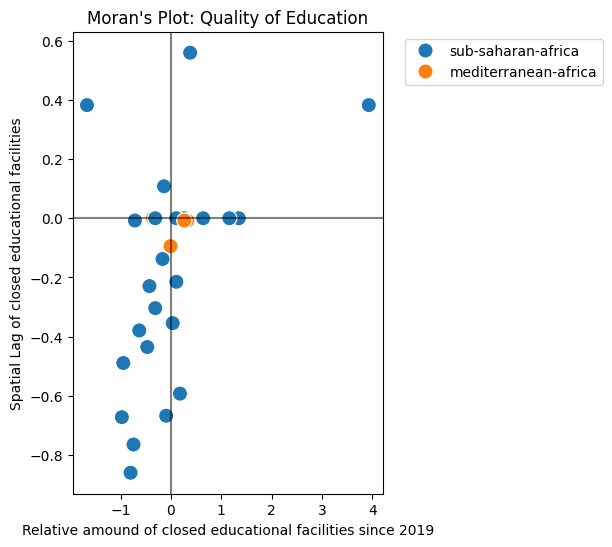

In [134]:
standardized_education = (africa_education_clean['unicef_total_closed'] - africa_education_clean['unicef_total_closed'].mean()) / africa_education_clean['unicef_total_closed'].std()
standardized_weights_education = pd.Series(ps.weights.lag_spatial(education_queen, standardized_education), index=standardized_education.index)

plot_data_education = pd.DataFrame({
    'standardized_scores': standardized_education,
    'spatial_lag': standardized_weights_education,
    'region': africa_education_clean['location']
})

f, ax = plt.subplots(1, figsize=(4,6))


sns.scatterplot(data=plot_data_education, x='standardized_scores', y='spatial_lag', hue='region', s=120)

plt.xlabel('Relative amound of closed educational days since 2019')
plt.ylabel('Spatial Lag of closed educational days')
plt.title("Moran's Plot: Quality of Education")

plt.axvline(0, c='black', alpha=0.5)
plt.axhline(0, c='black', alpha=0.5)

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

***Figure 1: Interpretation:***

There seems to be little increase of closed educational days since 2019 in Mediterranean Africa. One could argue this region is mostly correlated in its relative stability of education quality. In Sub-Saharan Africa however, there seems to be more significant difference between countries. 15 countries in the lower-left of the positively correlate with regards to their relatively low amount of closing days, whereas other countries seem to have a high amount of closing educational days since the pandemic. This could be interpreted as relative stability in the Mediterranean region, compared to Sub-Saharan Africa. 

### SDG10: Inequality

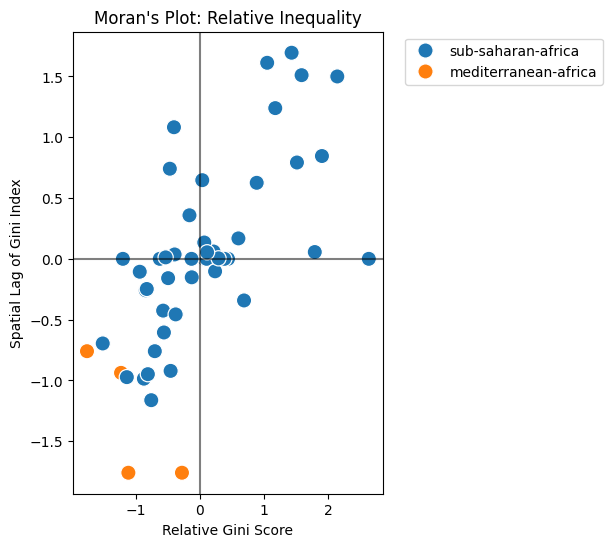

In [135]:
standardized_inequality = (africa_inequality_clean['gini'] - africa_inequality_clean['gini'].mean()) / africa_inequality_clean['gini'].std()
standardized_weights_inequality = pd.Series(ps.weights.lag_spatial(inequality_queen, standardized_inequality), index=standardized_inequality.index)

plot_data_inequality = pd.DataFrame({
    'standardized_scores': standardized_inequality,
    'spatial_lag': standardized_weights_inequality,
    'region': africa_inequality_clean['location']
})

f, ax = plt.subplots(1, figsize=(4,6))


sns.scatterplot(data=plot_data_inequality, x='standardized_scores', y='spatial_lag', hue='region', s=120)

plt.xlabel('Relative Gini Score')
plt.ylabel('Spatial Lag of Gini Index')
plt.title("Moran's Plot: Relative Inequality")

plt.axvline(0, c='black', alpha=0.5)
plt.axhline(0, c='black', alpha=0.5)

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

***Figure 2: Interpretation:***

It is very clear that relative inequality Mediterranean Africa based on the Gini score is low, compared to other parts of Africa. It would be interesting to see whether this trend is visible when looking at the regions in greater detail.

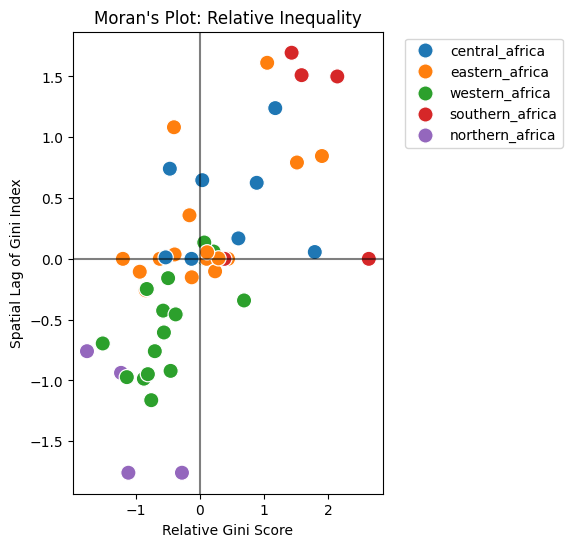

In [136]:
standardized_inequality = (africa_inequality_clean['gini'] - africa_inequality_clean['gini'].mean()) / africa_inequality_clean['gini'].std()
standardized_weights_inequality = pd.Series(ps.weights.lag_spatial(inequality_queen, standardized_inequality), index=standardized_inequality.index)

plot_data_inequality = pd.DataFrame({
    'standardized_scores': standardized_inequality,
    'spatial_lag': standardized_weights_inequality,
    'region': africa_inequality_clean['region']
})

f, ax = plt.subplots(1, figsize=(4,6))

sns.scatterplot(data=plot_data_inequality, x='standardized_scores', y='spatial_lag', hue='region', s=120)

plt.xlabel('Relative Gini Score')
plt.ylabel('Spatial Lag of Gini Index')
plt.title("Moran's Plot: Relative Inequality")

plt.axvline(0, c='black', alpha=0.5)
plt.axhline(0, c='black', alpha=0.5)

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

***Figure 3: Interpretation:***

Indeed, Northern Africa scores very low with regards to Gini, indicating there is relatively little inequality in that region. As expected, this trend continues, where equality in Western Africa is also relatively high, and gets lower when looking at Eastern, Central, and eventually Southern Africa.

## Task 4: Choropleth Maps

Use the same two variables you used in Task 3 and create a Choropleth Map. A choropleth map is a type of map which uses differences in shading, colouring, or the placing of symbols within predefined areas to indicate the average values of a particular quantity in those areas. Do a research on color-blindness and how to avoid it in creating visualisation. Choose a color-blind proof colour combination. Indicate where you found it and why you trust it with color-blind proofness. 


Does the map correspond to the findings in Morans plot?


***Chosen Colour map & motivation:*** 

[Since 2015](https://www.youtube.com/watch?v=xAoljeRJ3lU), the authors of SciPy have set the matplotlib default color map to [Viridis](https://sjmgarnier.github.io/viridis/). This color map was designed to improve graph readability for readers with common forms of color blindness and/or color vision deficiency. The color maps are also perceptually-uniform, both in regular form and also when converted to black-and-white for printing. I use seaborn that is build on matplotlib, and thus uses Viridis as well.

Since then, other [outlets](https://medium.com/analytics-vidhya/deep-dive-into-seaborn-palettes-7b5fae5a258e) such as this one have adapted the Viridis standard, which leads me to believe that it should be a suitable, color-blind proof color hue.

***Choropleth Maps***

### SDG4: Quality of Education

Text(0.5, 1.0, 'Loss in quality of education since pandemic (days of educational facility closures)')

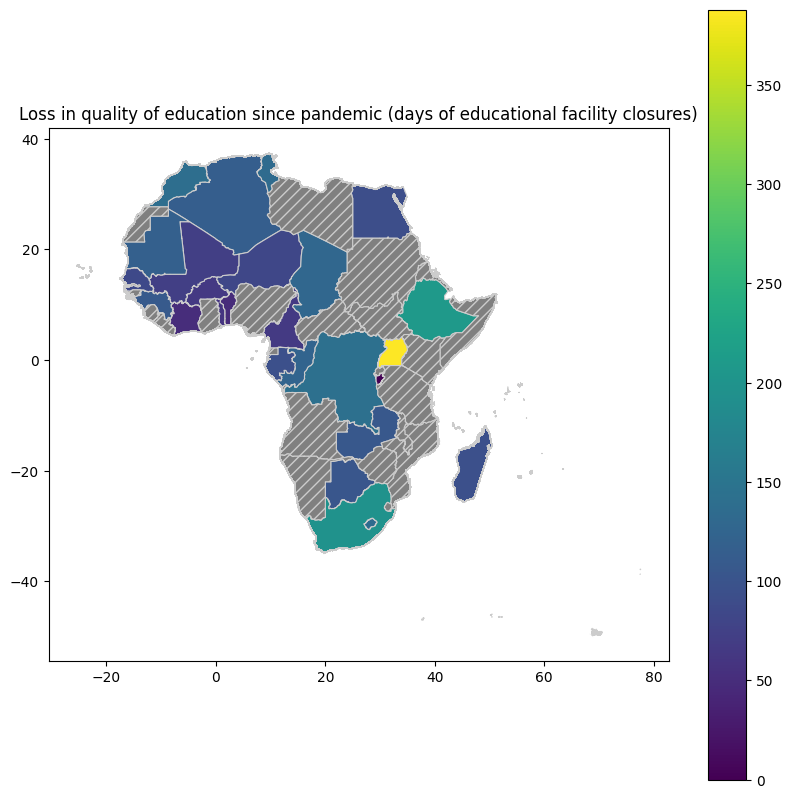

In [140]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

africa_education_quality = gpd.GeoDataFrame(africa_education_quality, geometry='geometry')

africa_education_quality.plot(column='unicef_total_closed', linewidth=0.8, ax=ax, edgecolor='0.8', missing_kwds={'color': 'grey', 'hatch': '///'})
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=africa_education_quality['unicef_total_closed'].min(), vmax=africa_education_quality['unicef_total_closed'].max()))
sm._A = []
cbar = plt.colorbar(sm, ax=ax)

ax.set_title("Loss in quality of education since pandemic (days of educational facility closures)")

***Figure 6: Interpretation:***

Here it is hard to say anything about regional loss in quality of education, since there is a lot of data missing. West Africa seems relatively stable with regards to their loss in educational days. There does not seem to be an apparent difference between Mediterranean and Sub-Saharan African countries.

### SDG10: Inequality

Text(0.5, 1.0, 'Inequality in Africa in 2019 (Based on Gini Index, higher means less equal)')

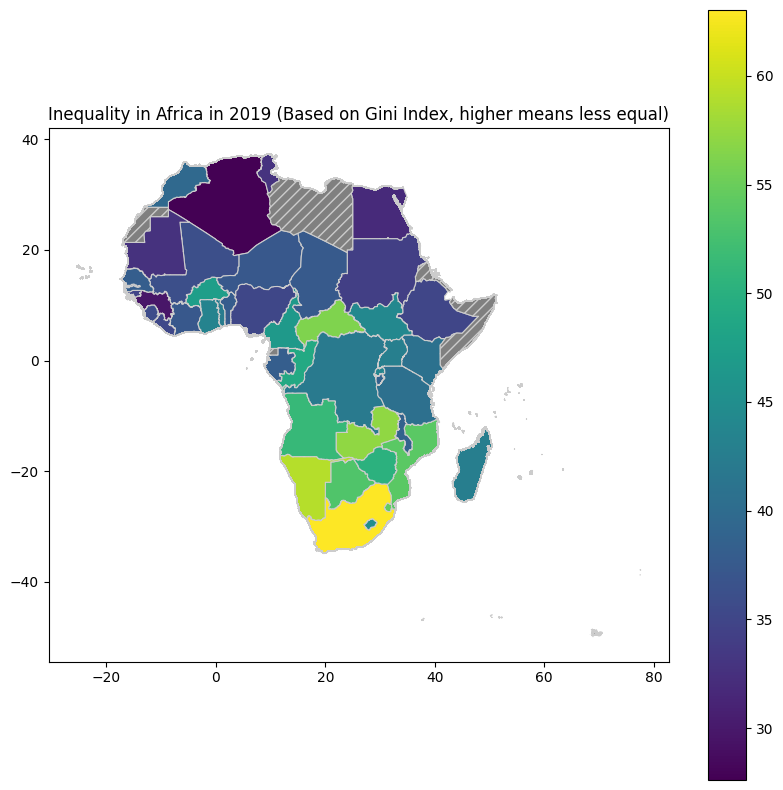

In [138]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

africa_inequality = gpd.GeoDataFrame(africa_inequality, geometry='geometry')

africa_inequality.plot(column='gini', linewidth=0.8, ax=ax, edgecolor='0.8', missing_kwds={'color': 'grey', 'hatch': '///'})
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=africa_inequality['gini'].min(), vmax=africa_inequality['gini'].max()))
sm._A = []
cbar = plt.colorbar(sm, ax=ax)

ax.set_title("Inequality in Africa in 2019 (Based on Gini Index, higher means less equal)")

***Figure 5: Interpretation:***

Even though data for one of the few Mediterranean countries is missing (i.e. Libya), we we can seee a pretty striking difference between the Mediterranean and Sub-Saharan African countries in inequality. Whereas inequality in Mediterranean Africa seems to be relatively low, inequality in Sub-Saharan Africa countries is relatively high. As was first shown in figure 3, we can clearly see a trend when looking at relative inequality based on the gini score per country when looking at the more Southern African countries. The farther south, the higher the relative inequality in that region.

## Task 5: Report

You visualized two variables related to your research questions. How would you interpret your findings and how does it help you to answer your research questions? 

Which extra variables would you like to use? What information are you missing in your current data? What kind of data could you use to improve your analysis?

Try to answer your research questions and don't shy away from suggesting future research. 

***Answer your research questions in 200-400 words:***

Regarding **SDG 4: Quality Education**
- Research question: *Using COVID-19 school closure index as a proxy variable for SDG4, how does Sub-Saharan Africa compare to Mediterranean Africa in loss of education days between 2019 and 2021?*

This assignment shows that relative to Sub-Saharan Africa, there does not seem to be an obvious difference in quality of education based on the COVID-19 school closure index. The fact that no difference could be spotted could be due to the relatively low amount of data that was in the used dataset. The only correlation between Mediterranean countries relative to the rest of the continent we observed, was the relative stability of lost education days in the region. Whereas the Sub-Saharan regions stood out in either their relatively low or high amount of lost education days, Mediterranean countries all seemed very stable with regard to this particular metric. 


Regarding **SDG 10: Reduced Inequalities**
- Research question: *Using the Gini index as a proxy variable for SDG10, how did Sub-Saharan Africa compare to Mediterranean Africa in 2019?*

**Note:** Gini indices measure inequality on a scale from zero, indicating perfect equality, to 100, indicating one person having all resources. Countries’ income Ginis typically lie within a range of 25 to 60.

**Note:** For all research quesions we distinguish between Sub-Saharan Africa (i.e. Western, Southern, Central, and Eastern Africa) and Mediterranean Africa (Northern Africa).

This assignment shows that relative to Sub-Saharan Africa, inequality in Mediterranean seems to be relatively low, based on the countries' Gini index. Additionally, as shown in the Moran Plots as well as the Chloropleth plot, this trend seems to be extended throughout the continent, where the further South a country is located on the continent, the higher the inequality in that country seems to be.

## How do we grade this assignment?
Please pay attention to the following points. We consider these in calculating your final grade.

First of all, we check if you have handed in the Jupyter notebook as well as a .pdf and .html version.

1st part


1.   We inspect the access to the correct shapefile from the link you have provides.
2.   We consider if the shapefile is suitable for answering your research question.
3. We consider your reasoning and motivation for selecting the shapefile.



2nd part
1. We consider the validity, scope and concreteness of the questions.
2. We inspect the data sources.


3rd part
1. We consider the Moran plots.
2. We consider the interpretations of the plots.

4th part
1. We consider the choropleth maps.
2. We consider the color scheme used in the maps and that a right process is used for selecting the color scheme.

5th part 
1. We consider the quality of your report and if each research question is concretely answered. 
2. We consider your reflection on the data you used.
3. We consider the interpretations deduced from the plots.
4. We consider your ideas for additional data and further research.
